In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../bstadt/NeuroDataResource')
sys.path.append('../../bstadt/Util')
sys.path.append('../../bstadt/Quality')
sys.path.append('../../bstadt/Collman')

from CollmanAlg import CollmanAlg
from NeuroDataResource import NeuroDataResource
from Quality import compute_overlap_array, get_unique_overlap
from skimage.measure import label

In [2]:
with open('../data/api_key.txt', 'r') as f:
    api_key = f.readline()

In [3]:
resource = NeuroDataResource('api.boss.neurodata.io',
                               api_key,
                               'collman',
                               'collman15v2',
                               [{'name': 'annotation', 'dtype': 'uint64'},
                                {'name': 'PSD95_488', 'dtype':'uint8'}])

In [12]:
def graph_performance(arr):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    fig.suptitle('Quantitative Performance of Collman Basic Algorithm', fontsize=16)
    fig.subplots_adjust(top=0.825)
    
    data = arr['predictionPerGt']
    counts = np.bincount(data)
        
    ax[0].bar(range(len(counts)), counts, width=0.8, align='center')
    ax[0].set(xticks=range(len(counts)))
    ax[0].set_title('Number of Predictions per Synapse')
    
    data = arr['gtPerPrediction']
    counts = np.bincount(data)
    
    ax[1].bar(range(len(counts)), counts, width=0.8, align='center')
    ax[1].set(xticks=range(len(counts)))
    ax[1].set_title('Number of Synapses per Prediction')
    
    return fig

In [5]:
def get_overlaps(resource, z_range, y_range, x_range):
    collman_alg = CollmanAlg(resource, 3.)
    detections = collman_alg.detect(z_range, y_range, x_range)
    gt = resource.get_cutout('annotation', z_range, y_range, x_range)
    #psd_95 = resource.get_cutout('PSD95_488', z_range, y_range, x_range)
    
    overlapDict = compute_overlap_array(detections, gt)
    return overlapDict

Examine the performance of Collman basic algorithm at different sections of the data.

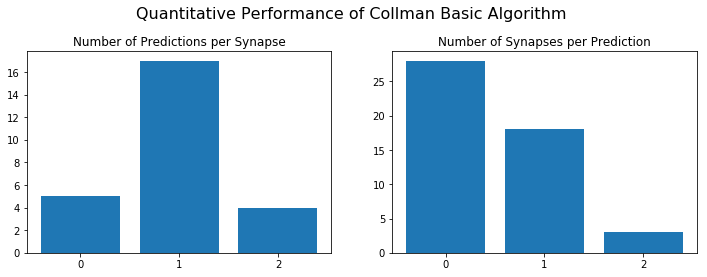

In [6]:
graph_performance(get_overlaps(resource, [4, 14], [1000, 3000], [1000, 3000]))

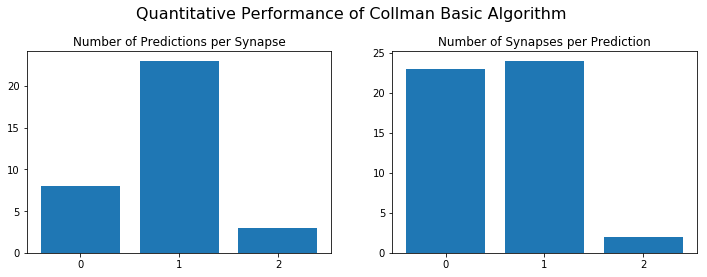

In [8]:
graph_performance(get_overlaps(resource, [14, 24], [1000, 3000], [1000, 3000]))

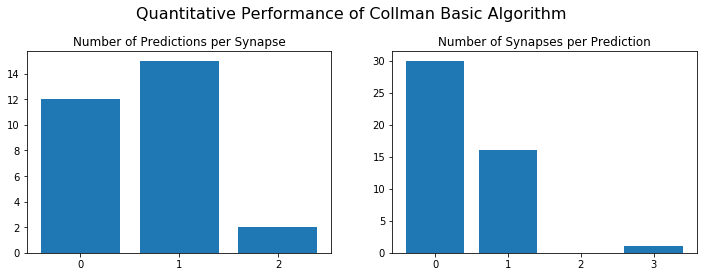

In [13]:
graph_performance(get_overlaps(resource, [7, 17], [1500, 3500], [2500, 4500]))

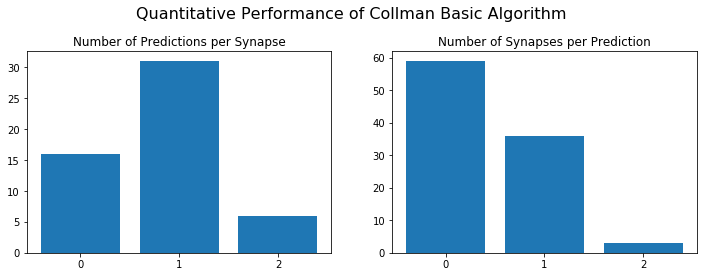

In [14]:
graph_performance(get_overlaps(resource, [4, 14], [1000, 4000], [1000, 4000]))

Visualization of the annotation, PSD95 and prediction channels.

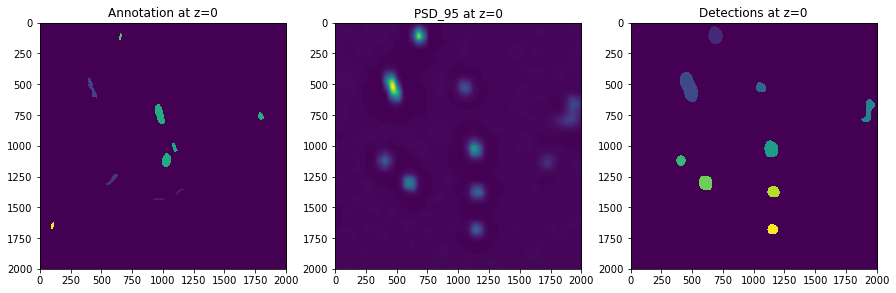

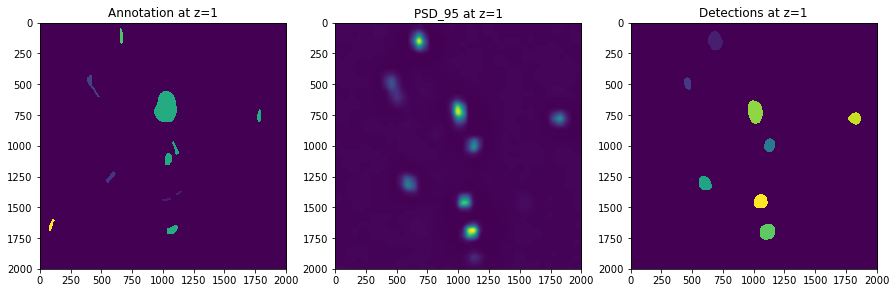

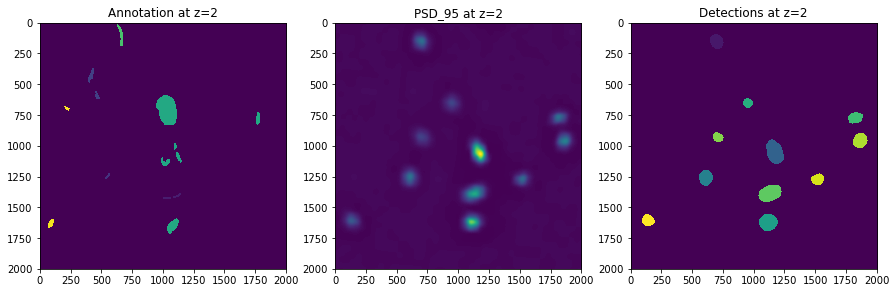

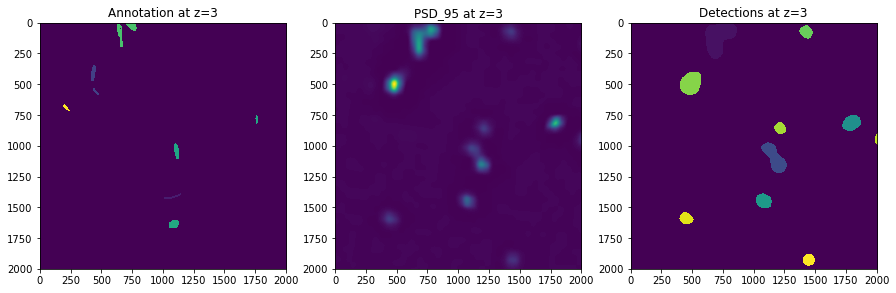

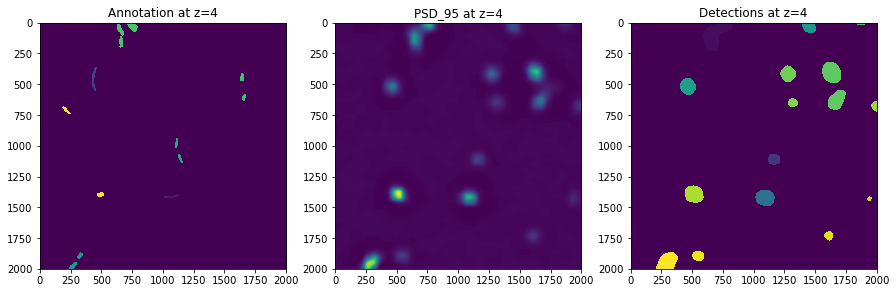

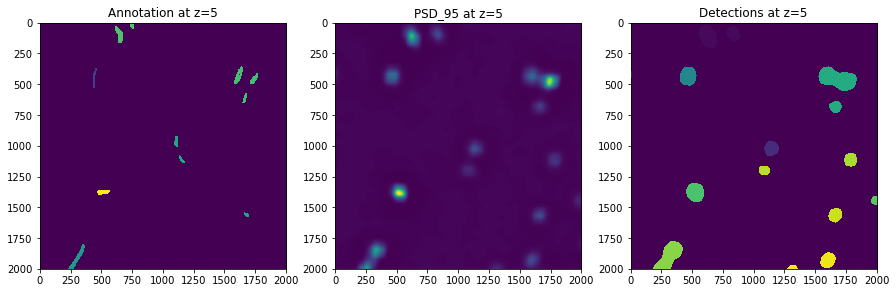

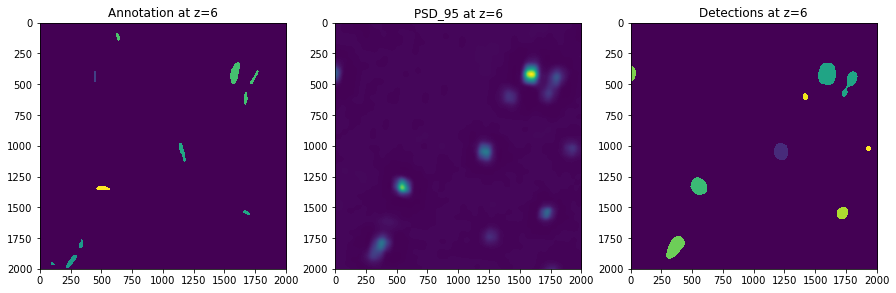

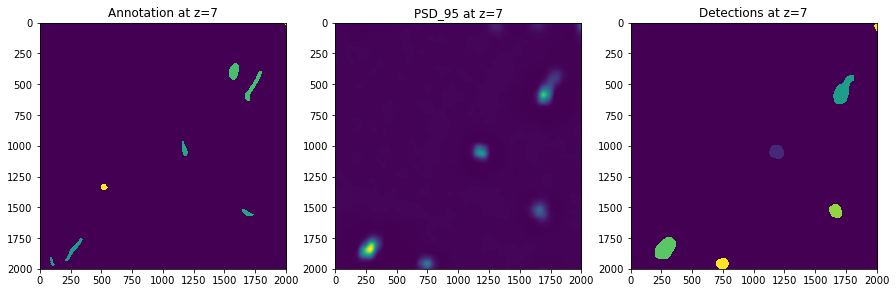

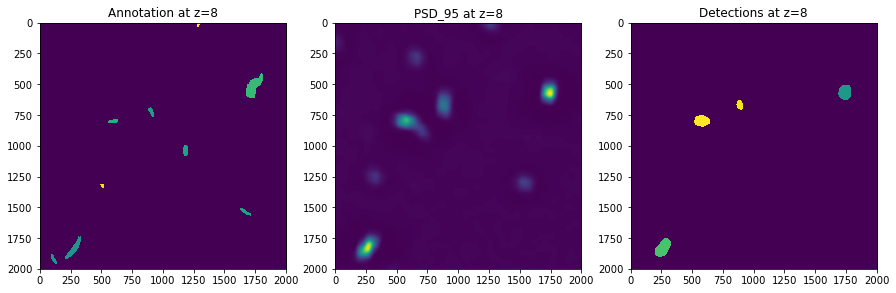

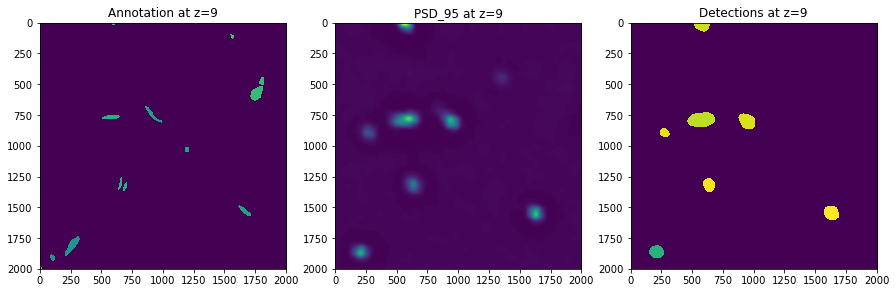

In [20]:
for i in range(10):
    plt.figure(figsize=(15, 35))
    plt.subplot(131)
    plt.title('Annotation at z=' + str(i))
    plt.imshow(gt[i])
    plt.subplot(132)
    plt.title('PSD_95 at z=' + str(i))
    plt.imshow(psd_95[i])
    plt.subplot(133)
    plt.title('Detections at z='+ str(i))
    plt.imshow(detections[i])
    plt.show()